In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 3) # (w, h)
plt.rcParams["figure.dpi"] = 200
np.random.seed(42)


# Logistic Regression 3-class Classifier


Show below is a logistic-regression classifiers decision boundaries on the
first two dimensions (sepal length and width) of the `iris
<https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ dataset. The datapoints
are colored according to their labels.




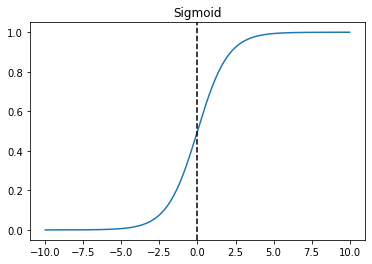

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
x = np.linspace(-10, 10, 200)
plt.plot(x, sigmoid(x))
plt.axvline(x=0, color='k', linestyle='--');
plt.title("Sigmoid");

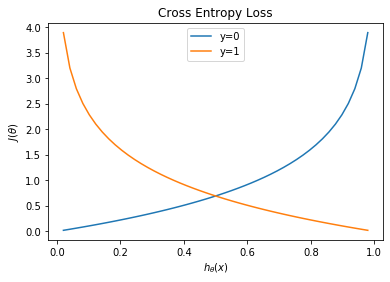

In [3]:
h = np.linspace(0, 1)[1:-1]
for y in [0, 1]:
    plt.plot(h, -y * np.log(h) - (1 - y) * np.log(1 - h), label=f"y={y}")
plt.title("Cross Entropy Loss")
plt.xlabel('$h_ {\\theta}(x)$'); plt.ylabel('$J(\\theta)$')
plt.legend();

In [41]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum(
        -y * np.log(h) - (1 - y) * np.log(1 - h)
    )
    grad = 1 / m * ((y - h) @ x)
    return cost, grad

def fit(x, y, max_iter=5000, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)

        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad

        thetas.append(theta)
    return thetas, classes, costs

def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas]
    ) for xi in x]
    print(preds)
    print(classes)
    return [classes[p] for p in preds]

In [42]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=[
    "Sepal length (cm)",
    "Sepal width (cm)",
    "Petal length (cm)",
    "Petal width (cm)",
    "Species"
])
df.head()
df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

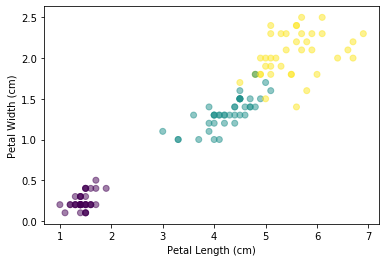

In [43]:

df['Species'] = df['Species'].astype('category').cat.codes
data = np.array(df)
np.random.shuffle(data)
num_train = int(.8 * len(data))  # 80/20 train/test split
x_train, y_train = data[:num_train, :-1], data[:num_train, -1]
x_test, y_test = data[num_train:, :-1], data[num_train:, -1]
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");

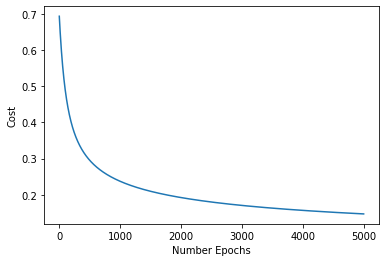

In [44]:
thetas, classes, costs = fit(x_train[:, 2:], y_train)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');

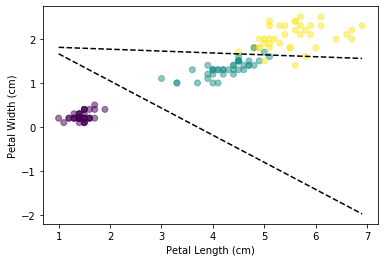

In [45]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)")
for theta in [thetas[0],thetas[2]]:
    j = np.array([x_train[:, 2].min(), x_train[:, 2].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--")

In [49]:
def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y)

print(f"Train Accuracy: {score(classes, thetas, x_train[:, 2:], y_train):}")
print(f"Test Accuracy: {score(classes, thetas, x_test[:, 2:], y_test):}")

[1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1]
[0. 1. 2.]
Train Accuracy: [ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  Tr